In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("E:/Projects/Tasks/Task5/archive/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()
# Check Missing Values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [6]:
print(df["gender"].value_counts(normalize=True) * 100)
print()
print(df["race/ethnicity"].value_counts(normalize=True) * 100)
print()
print(df["parental level of education"].value_counts(normalize=True) * 100)
print()
print(df["lunch"].value_counts(normalize=True) * 100)

gender
female    51.8
male      48.2
Name: proportion, dtype: float64

race/ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64

parental level of education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64

lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64


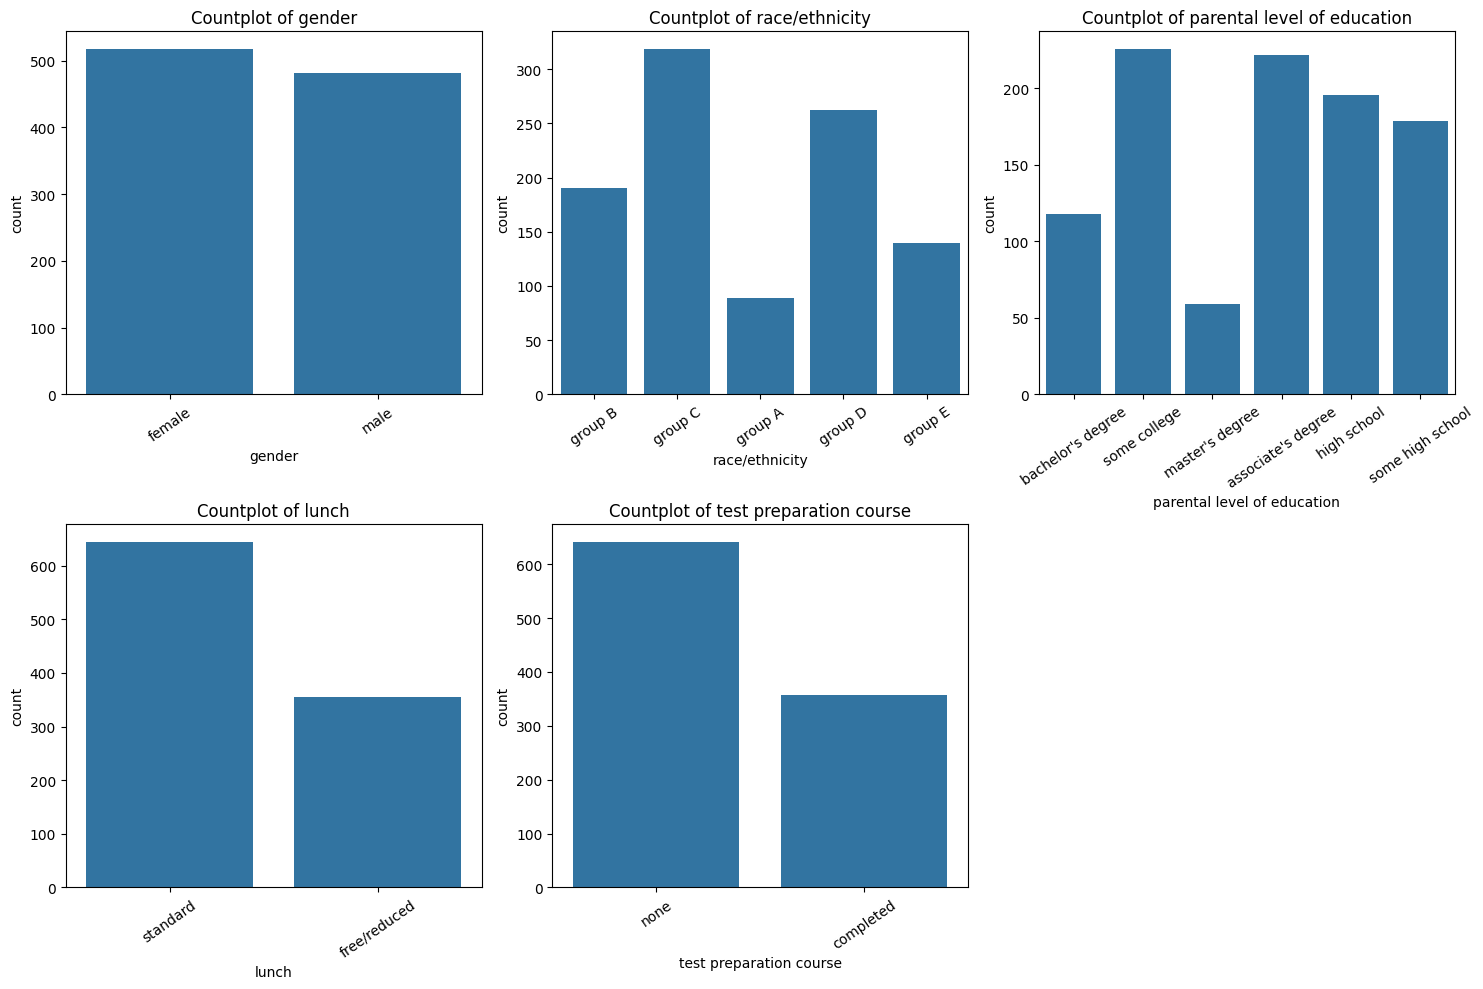

In [7]:
Categorical_col = ["gender","race/ethnicity","parental level of education","lunch","test preparation course"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10)) 
axes = axes.flatten()

for i, col in enumerate(Categorical_col):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=35)
# Turn off unused subplots if there are any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

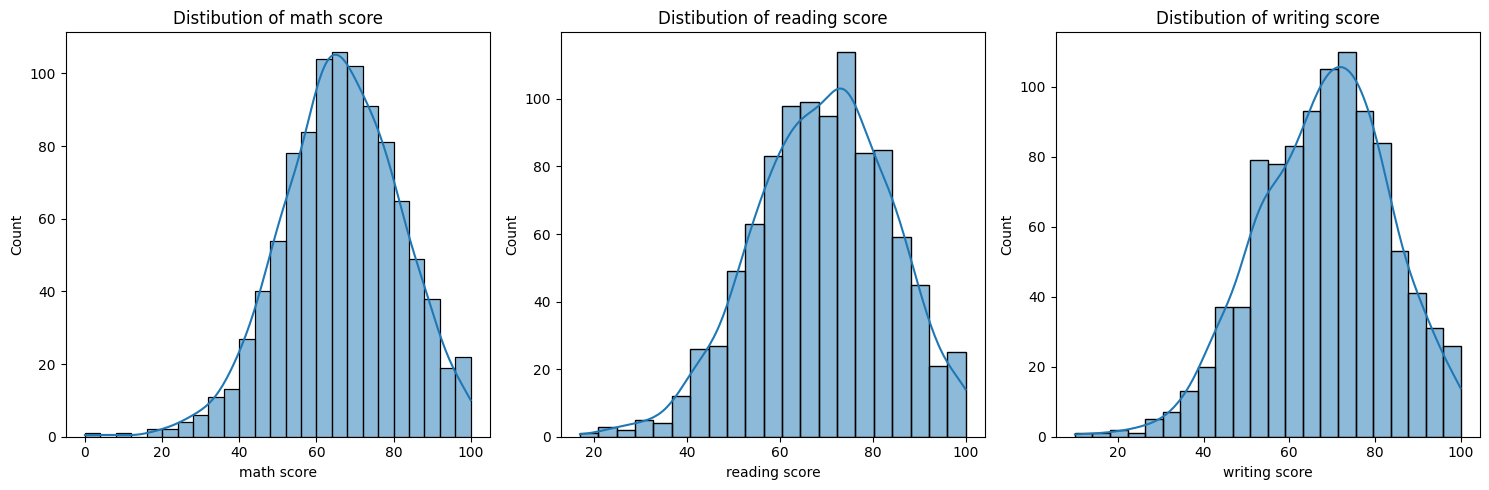

In [8]:
numerical_col = ['math score', 'reading score', 'writing score']

fig, axes = plt.subplots(1, len(numerical_col), figsize = (15,5))
for i, col in enumerate(numerical_col):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distibution of {col}')
plt.tight_layout()
plt.show()

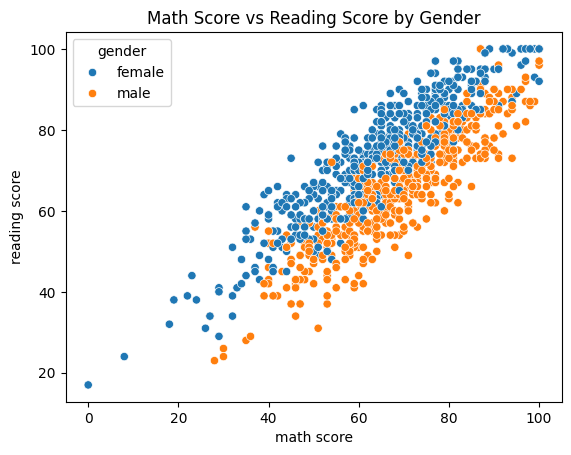

In [9]:
# 🔗 6. Bivariate Analysis
# ----------------------------------------

sns.scatterplot(data=df,x='math score', y='reading score',hue='gender')
plt.title("Math Score vs Reading Score by Gender")
plt.show()

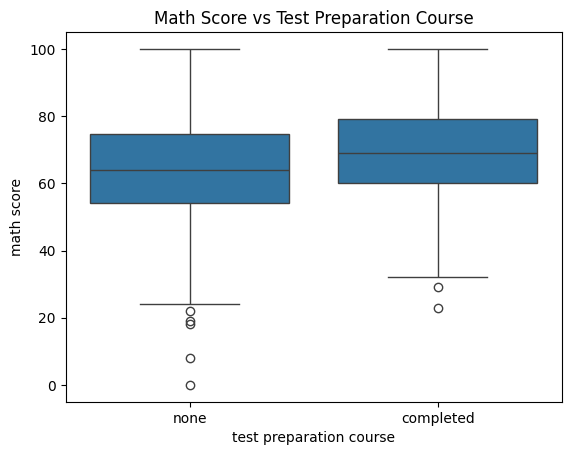

In [10]:
# Boxplot: test preparation course vs math score
sns.boxplot(data=df, x='test preparation course', y= 'math score')
plt.title('Math Score vs Test Preparation Course')
plt.show()

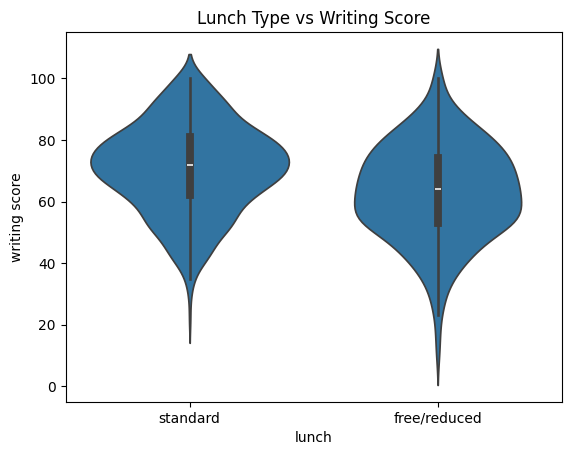

In [11]:
# Violin plot: Lunch vs Writing score
sns.violinplot(data=df,x="lunch",y='writing score')
plt.title('Lunch Type vs Writing Score')
plt.show()

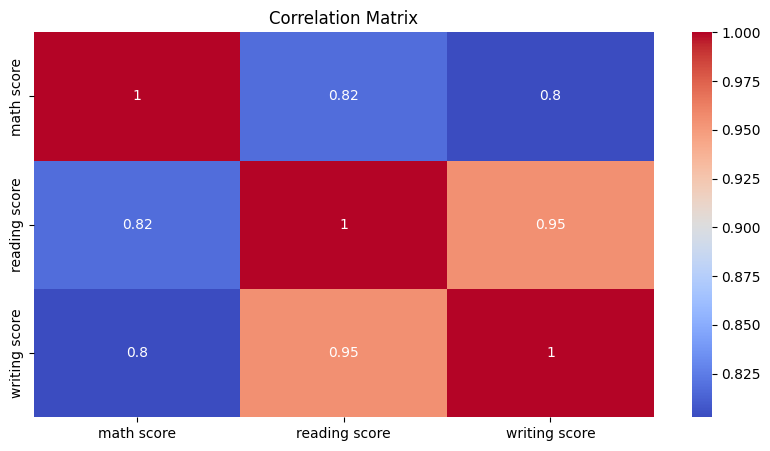

In [12]:
# ----------------------------------------
#  7. Correlation Analysis
# ----------------------------------------

plt.figure(figsize=(10,5))
sns.heatmap(df[numerical_col].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


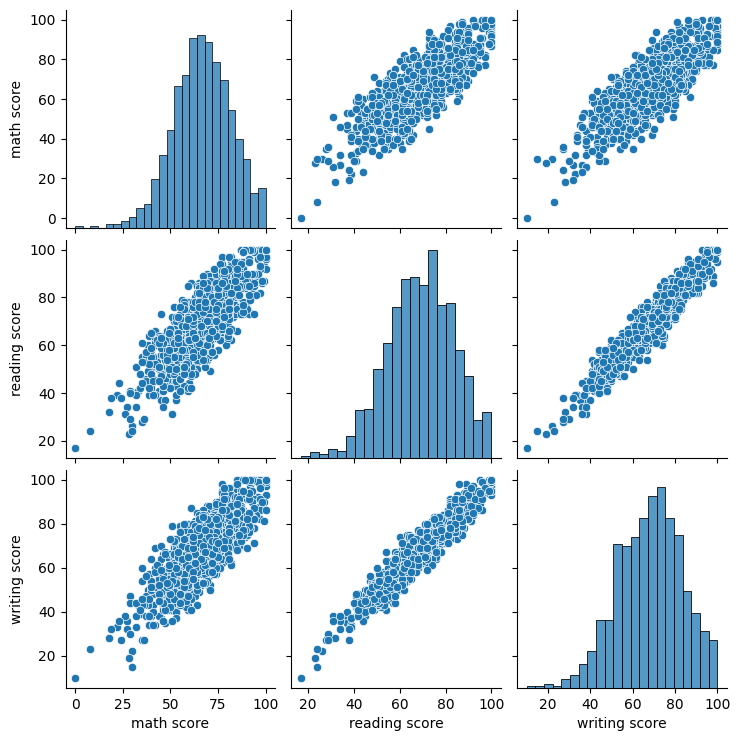

In [13]:
sns.pairplot(data=df)
plt.show()